In [2]:
import numpy as np

In [3]:
positive_samples = 50
negative_samples = 50

In [9]:
x1 = np.vstack((np.random.normal(2, 0.5, (positive_samples,1)), np.random.normal(5, 0.5, (positive_samples,1))))
x2 = np.vstack((np.random.normal(5, 0.5, (negative_samples,1)), np.random.normal(2, 0.5, (negative_samples,1))))
y1 = np.ones((positive_samples))
y2 = np.ones((negative_samples))*-1
u1 = np.vstack((np.random.normal(4, 0.5, (1,1)), np.random.normal(6, 0.5, (1,1))))
k = 3

In [11]:
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

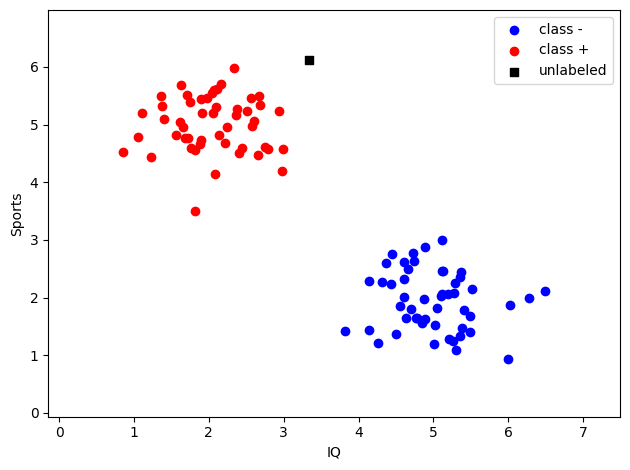

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x[y==-1, 0], x[y==-1, 1],
            c='b', marker='o', label='class -')
plt.scatter(x[y==1, 0], x[y==1, 1],
            c='r', marker='o', label='class +')
plt.scatter(u1[0], u1[1],
            c='k', marker='s', label='unlabeled')

plt.xlim(x[:, 0].min()-1, x[:, 0].max()+1)
plt.ylim(x[:, 1].min()-1, x[:, 1].max()+1)
plt.xlabel('IQ')
plt.ylabel('Sports')
plt.legend(loc='best')
plt.tight_layout()
#plt.savefig(output+'fig-two-moon.png', dpi=300)
plt.show()

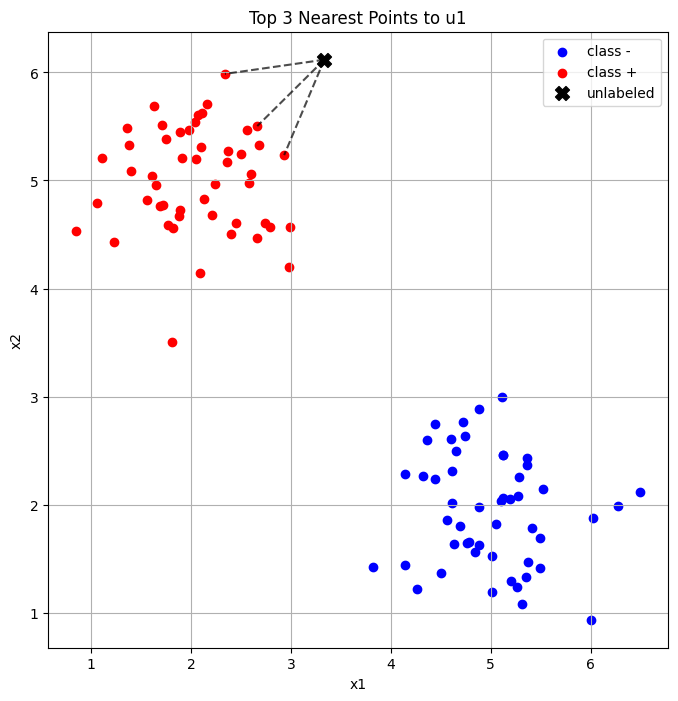

votes=Counter({1.0: 3})


In [23]:
from collections import Counter

# Calculate distances from u1 to all points
distances = np.sqrt((x[:, 0] - u1[0])**2 + (x[:, 1] - u1[1])**2)

# Sort distances in ascending order and get indices
sorted_indices = np.argsort(distances)

# Take top k elements
top_k_indices = sorted_indices[:k]
top_k_points = x[top_k_indices]

# Plot data
plt.figure(figsize=(8, 8))
# plt.scatter(x1, x2, color='blue', label='Data Points', alpha=0.6)
plt.scatter(x[y==-1, 0], x[y==-1, 1],
            c='b', marker='o', label='class -')
plt.scatter(x[y==1, 0], x[y==1, 1],
            c='r', marker='o', label='class +')
plt.scatter(u1[0], u1[1], color='k', label='unlabeled', marker='X', s=100)

# Draw dotted lines to top k points
for point in top_k_points:
    plt.plot([u1[0, 0], point[0]], [u1[1, 0], point[1]], 'k--', alpha=0.7)

# Highlight top k points
# plt.scatter(top_k_points[:, 0], top_k_points[:, 1], color='green', label='Top k Points', s=100)

plt.title(f'Top {k} Nearest Points to u1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.grid(True)
plt.show()

votes = Counter(y[top_k_indices])
print(f"{votes=}")